# Project 2 Notebook

# Textproposal
Data source: https://data.world/sumitrock/insurance

DATA DISCOVERY:
By searching the required domains in data world website, I came across this dataset. Data is free to download, Getting and using data doesn't violate terms of service. Documented EDA is not available for the data. But we should login with any Gmail to get the data

Size of Data:
64.49 kB and 10 columns, 1,340 rows in table

Context:

- 1.Do charges of people who smoke differ significantly from the people who don't?

- 2.Does bmi of males differ significantly from that of females?

- 3.Is the proportion of smokers significantly different in different genders?

- 4.Is the distribution of bmi across women with no children, one child and two children, the same?

Data Description: The data at hand contains medical costs of people characterized by certain attributes.

Domain: Healthcare



For most organizations, utilizing consumer data is critical. Customers' characteristics such as the ones listed below might be critical in making business decisions for an insurance company. As a result, being able to explore and generate value from such data is an valuable skill to have.

Attribute Information: age: age of primary beneficiary gender: insurance contractor gender, female, male bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^2) using the ratio of height to weight, ideally 18.5 to 24.9 children: Number of children covered by health insurance / Number of dependents smoker: Smoking region: the beneficiary's residential area, northeast, southeast, southwest, northwest. claim: Individual medical costs billed by health insurance

**1.Import the necessary libraries**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')

 **2.Read the data as a data frame**

In [2]:
# reading data set from provided CSV to a dataframe 'insurance' using pandas
insurance = pd.read_csv('insurance_data_.csv')


In [3]:
# printing head of the dataframe 'insurance'
insurance.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


**3.Perform basic EDA which should include the following and print out your insights at every step**

**3(a).Shape of the data**

In [4]:
#checking shape of the 'insurance' dataframe
insurance.shape

(1340, 10)

**3(b).Data type of each attribute**

In [5]:
#checking data types of all columns
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


**3(c).Checking the presence of missing values**

In [7]:
#using 'isnull' function to check missing values in dataframe
insurance.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
insurance.dropna(inplace=True)

In [9]:
insurance.shape

(1332, 10)

In [10]:
insurance.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [11]:
insurance['age'] = insurance['age'].astype(int)

**3(d).5 point summary of numerical attributes**

In [12]:
# using 'describe' function to print 5 point summary for numerical attributes
insurance.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


 **3(e).Distribution of ‘bmi’, ‘age’ and ‘charges’ columns**

In [21]:
#to display grid in plot
sns.set(style="whitegrid")

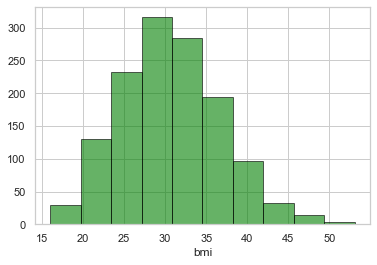

<AxesSubplot:xlabel='bmi', ylabel='Density'>

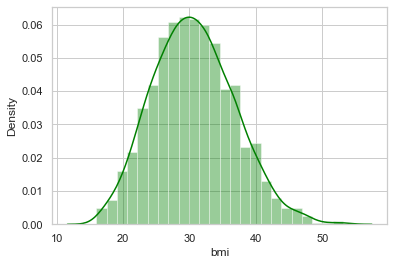

In [24]:
#ploting histogram and dist plot to see distribution of 'bmi' column
plt.hist(insurance['bmi'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(insurance['bmi'], color= 'green')

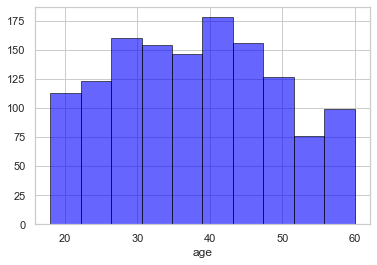

<AxesSubplot:xlabel='age', ylabel='Density'>

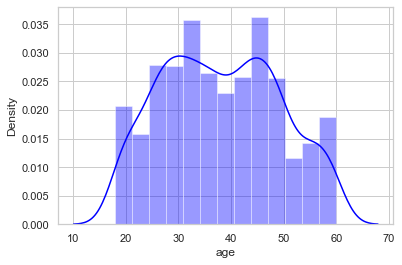

In [26]:
#ploting histogram and dist plot to see distribution of 'age' column
plt.hist(insurance['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(insurance['age'], color= 'blue')


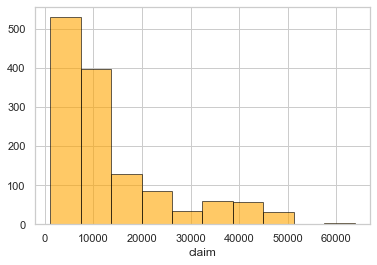

<AxesSubplot:xlabel='claim', ylabel='Density'>

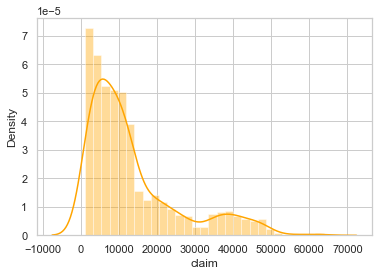

In [30]:
#ploting histogram and dist plot to see distribution of 'claim' column
plt.hist(insurance['claim'], color= 'orange', edgecolor = 'black', alpha = 0.6)
plt.xlabel('claim')
plt.show()

sns.distplot(insurance['claim'], color= 'orange')

# Hypothesis 1

**Do charges of people who smoke differ significantly from the people who don't?**

In [13]:
# displaying count of smokers and non-smokers
insurance.smoker.value_counts()

No     1058
Yes     274
Name: smoker, dtype: int64

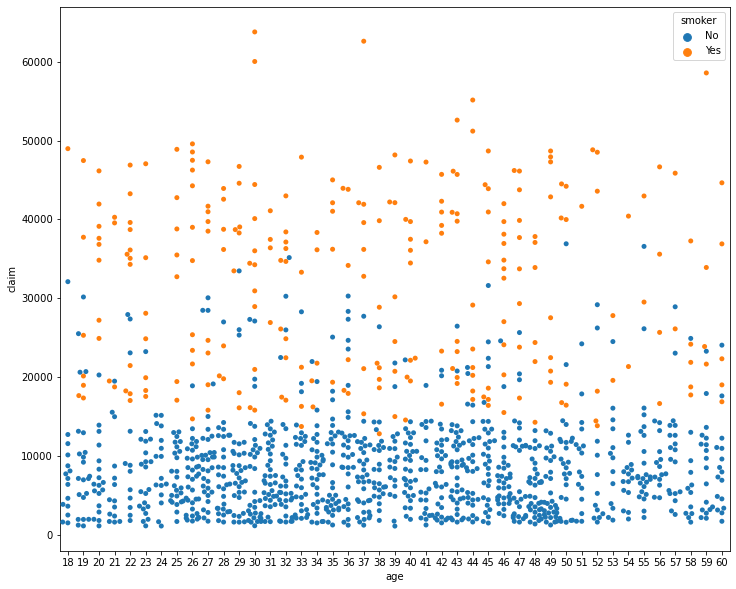

In [14]:
# plotting swarm plot to make comparison over distribution of 'smoker' with respect to 'claim' and 'age'
plt.figure(figsize=(12,10))
sns.swarmplot(y='claim',x='age',hue='smoker',data=insurance)
plt.show()


In [15]:
# applying T-test to analyse the effect of smoking on the charges
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insurance[insurance.smoker == 'Yes'].claim) 
y = np.array(insurance[insurance.smoker == 'No'].claim)

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

1.7254274869224866e-281


Conclusion: Rejecting Null hypothesis as the p-value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers

# Hypothesis 2

**Does bmi of males differ significantly from that of females?**

In [16]:
# displaying count of male and females
insurance.gender.value_counts()

male      670
female    662
Name: gender, dtype: int64

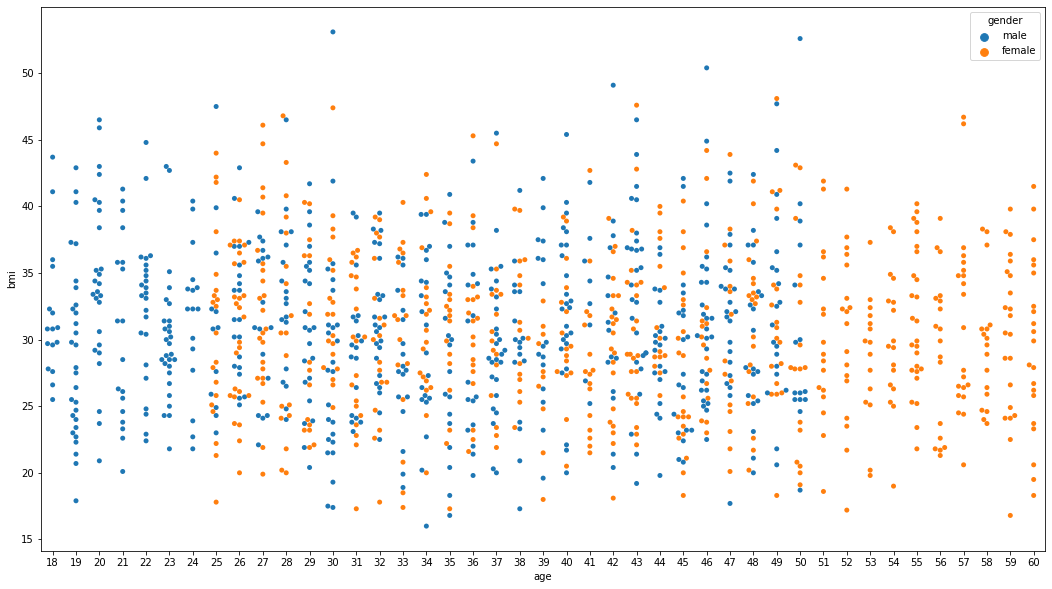

In [17]:
# plotting swarm plot to make comparison over distribution of 'gender' with respect to 'bmi' and 'age'
plt.figure(figsize=(18,10))
sns.swarmplot(y='bmi',x='age',hue='gender',data=insurance)
plt.show()

In [18]:
#applying T-test to analyse the effect of gender on the bmi
Ho = "bmi of males does not differ significantly from females"   
Ha = "bmi of males differ significantly from females"   

x = np.array(insurance[insurance.gender == 'male'].bmi)  
y = np.array(insurance[insurance.gender== 'female'].bmi) 

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.09863102812217481


Conclusion:Accepting Null hypothesis as the p-value is greater than 0.05. Hence, BMI does not change significantly on basis of Gender.

# Hypothesis 3 

**Is the proportion of smokers significantly different in different genders?**

In [19]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

# applying Chi_square test
crosstab = pd.crosstab(insurance['gender'],insurance['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.005058917721032742


Conclusion:Rejecting Null hypothesis as the p-value is less than 0.05. So, Smoking Habits differs from gender to gender

# Hypothesis 4

**Is the distribution of bmi across women with no children, one child and two children, the same?**

In [20]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

# copy females data to another dataframe
fem = insurance[insurance['gender'] == 'female'].copy()

zero = fem[fem.children == 0]['bmi']
one = fem[fem.children == 1]['bmi']
two = fem[fem.children == 2]['bmi']

# applying Anova Test
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7148335064686346


Conclusion: Accepting Null hypothesis as the p-value is greater than 0.05. So, the number of children does not bring any difference in women's bmi.